# Omission Rate

It is observed that many POCSO offences that are present in the judgements are not registered in the metadata.

## POCSO Offences:
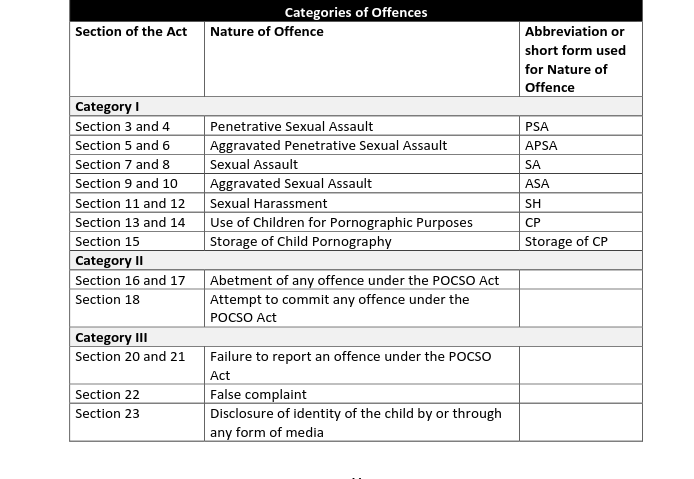

In [1]:
pocso_procedural_sections = ["'19'"]
for i in range(24, 47):
    pocso_procedural_sections.append("'{}'".format(i))

In [2]:
import pandas as pd
import regex as re

In [3]:
pocso_ner = pd.read_csv('POCSO.csv')

In [4]:
pocso_ner = pocso_ner.fillna('')

In [5]:
pocso_ner.statute_opennyai.unique()

array(['Code Of Criminal Procedure', 'Evidence Act',
       'Indian Evidence Act, 1872', 'Indian Penal Code',
       'Limitation Act, 1963', 'POCSO Act', '.P.C.', 'Of POCSO Act',
       'Code Of Civil Procedure', 'Ipc Of Indian Penal Code',
       'Cr.P:-C.\\At The', 'Of Indian Penal Code',
       'Penetrative Sexual Assault,.-', '.P.C', 'Pocsq Act', 'R.P.C.',
       'Posco Act', 'Ipg', 'Ofpocso Act', 'Pogeso. Act', 'Popcso Act',
       'Posco Act 2012', 'Cr.P,C.', 'Indian Evidence Act 1872',
       'POCSO Act, 2012', 'Oflpc', 'Probation Of Offenders Act', 'Cr',
       'S 376 Of Indian Penal Code', 'Cr.P', 'Evidence Act, 1872',
       'Indian Evidence Act, 1987', 'Oaths Act, 1873', '|.P.C', 'Cfpc',
       'Income Tax Act', 'Information Technology Act', 'Pocspo Act'],
      dtype=object)

Many variants of POCSO - this has to be cleaned.

In [6]:
for idx, row in pocso_ner.iterrows():
    if any(ext in row.statute_opennyai.lower() for ext in ['pocso','pocspo', 'pocsq', 'posco', 'pogeso', 'popcso']):
        pocso_ner.loc[idx,'statute_opennyai'] = 'POCSO'

In [7]:
pocso_ner.statute_metadata.unique()

array(['Protection of Children from Sexual Offence Act 2012', '',
       'Protection of Children from Sexual Offences', 'Indian Penal Code',
       'Pocso 2012', 'Protection of Children from sexual offence Act',
       '1Indian Penal Code',
       '5Protection of children from sexual offence act 2012',
       'Protection of Children from Sexual Offences Act,2012',
       "Protection of Children from Sexual Offences Act'2012",
       'Information Technology Act'], dtype=object)

In [8]:
for idx, row in pocso_ner.iterrows():
    if any(ext in row.statute_metadata.lower() for ext in ['children', 'pocso']):
        pocso_ner.loc[idx,'statute_metadata'] = 'POCSO'

In [9]:
# Considering only POCSO statutes
pocso_ner_metadata = pocso_ner[pocso_ner.statute_metadata=='POCSO'][['case_id', 'statute_metadata' , 'provision_metadata']]
pocso_ner_opennyai = pocso_ner[pocso_ner.statute_opennyai=='POCSO'][['case_id', 'statute_opennyai' , 'provision_opennyai']]
pocso_ner_opennyai = pocso_ner_opennyai.groupby(['case_id'])['provision_opennyai'].apply(lambda x: ','.join(x)).reset_index()


pocso_statutes = pocso_ner_opennyai.merge(pocso_ner_metadata, on='case_id')

In [10]:
omission_rates = []
for idx, row in pocso_statutes.iterrows():
    
    #### DONT COUNT PROCEDUAL SECTIONS IN OFFENCES
    opennyai_offences = list(set(re.findall(r"\'*\d+\'", row.provision_opennyai)) -set(pocso_procedural_sections))
    number_of_offences_opennyai = len(opennyai_offences)
    
    metadata_offences = list(set(re.findall(r"\'*\d+\'", row.provision_metadata)))
    
    metadata_opennyai_match = 0
    
    
    
    i = 0
    while i < number_of_offences_opennyai:
        if opennyai_offences[i] in metadata_offences:
            metadata_opennyai_match = metadata_opennyai_match+1
        i=i+1
            
    percentage_match = 100*metadata_opennyai_match/number_of_offences_opennyai
    omission_rate = 100 - percentage_match
    omission_rates.append(omission_rate)
    

In [11]:
pocso_statutes['omission_rate'] = omission_rates

In [12]:
pocso_statutes.to_csv('POCSO_omission_rate.csv', index=False)

In [13]:
pocso_statutes

,case_id,provision_opennyai,statute_metadata,provision_metadata,omission_rate
0,ASBR010001322018,"['11', '12'],['12']",POCSO,['12'],50.000000
1,ASBR010003042019,"['4'],['4']",POCSO,['4'],0.000000
2,ASBR010003392018,"['366(A) Ipc', '4', '366(A) Ipc', '4']",POCSO,['4'],0.000000
3,ASBR010009782017,['4'],POCSO,['4'],0.000000
4,ASBR010011522019,"['3 (A) To (D)', '3', '4']",POCSO,['4'],50.000000
5,ASBR010013262018,['4'],POCSO,['4'],0.000000
6,ASBR010014222017,['4'],POCSO,['4'],0.000000
7,ASBR010018052018,"['313', '4']",POCSO,['8'],100.000000
8,ASBR010018192018,"['12 Not U', '12/18', '11', '12', '18'],['12']",POCSO,['12'],75.000000
9,ASBR080001152019,"['18', '8']",POCSO,['18'],50.000000
